<a href="https://colab.research.google.com/github/Yuliana2001/Entrega_final/blob/main/04%20-%20modelo%20con%20preprocesado%20y%20GradientBoostingClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto para el curso de IA 2024-2
# Modelos de clasificación para la predicción de desempeño de un estudiante

**Tabla de contenido:**


1.   Exploración de los Datos
2.   Preprocesamiento
3.   Construcción de Modelos
4.   Discusión y Conclusiones


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yulianaalzate","key":"e908c40352f267673894f240acc80057"}'}

# `1. Exploración de archivos`


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 50% 10.0M/20.1M [00:00<00:00, 100MB/s]
100% 20.1M/20.1M [00:00<00:00, 126MB/s]


In [5]:
!unzip udea*.zip > /dev/null

In [13]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 12)


In [7]:
z.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Secundaria (Bachillerato) completa,No,medio-alto
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Técnica o tecnológica completa,Si,alto
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,medio-bajo
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Educación profesional incompleta,Si,medio-bajo
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Postgrado,Si,alto


In [8]:
z = z[['FAMI_EDUCACIONMADRE','FAMI_EDUCACIONPADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
z.head(8)

,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,Postgrado,Técnica o tecnológica incompleta,Entre 5.5 millones y menos de 7 millones,medio-alto
1,Técnica o tecnológica incompleta,Técnica o tecnológica completa,Entre 2.5 millones y menos de 4 millones,bajo
2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,bajo
3,Secundaria (Bachillerato) completa,No sabe,Entre 4 millones y menos de 5.5 millones,alto
4,Primaria completa,Primaria completa,Entre 2.5 millones y menos de 4 millones,medio-bajo
5,Secundaria (Bachillerato) completa,Educación profesional completa,Más de 7 millones,medio-alto
6,Técnica o tecnológica completa,Educación profesional incompleta,Entre 2.5 millones y menos de 4 millones,alto
7,Secundaria (Bachillerato) incompleta,Primaria incompleta,Entre 1 millón y menos de 2.5 millones,medio-bajo


<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

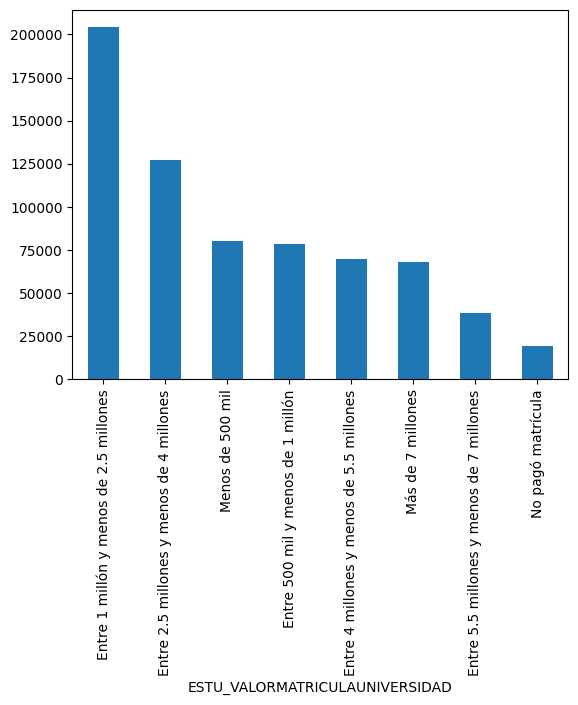

In [9]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

In [10]:
print("Número de estudiantes: "+str(z.shape[0]))

Número de estudiantes: 692500


# 2. Preprocesamiento

In [11]:
z.FAMI_EDUCACIONMADRE.values[z.FAMI_EDUCACIONMADRE.isna()] = 'No sabe'
z.FAMI_EDUCACIONPADRE.values[z.FAMI_EDUCACIONPADRE.isna()] = 'No sabe'

In [14]:
z.FAMI_EDUCACIONMADRE.values[z.FAMI_EDUCACIONMADRE.isna()] = 'no info'
z.FAMI_EDUCACIONPADRE.values[z.FAMI_EDUCACIONPADRE.isna()] = 'no info'
z.ESTU_VALORMATRICULAUNIVERSIDAD.values[z.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
z.ESTU_HORASSEMANATRABAJA.values[z.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
z.FAMI_ESTRATOVIVIENDA.values[z.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
z.FAMI_TIENEINTERNET.values[z.FAMI_TIENEINTERNET.isna()] = 'no info'
z.ESTU_PAGOMATRICULAPROPIO.values[z.ESTU_PAGOMATRICULAPROPIO.isna()] = 'no info'
z.ESTU_HORASSEMANATRABAJA.values[z.ESTU_HORASSEMANATRABAJA.isna()] = '0'
z.FAMI_EDUCACIONMADRE.values[z.FAMI_EDUCACIONMADRE.isna()] = 'No sabe'
z.FAMI_EDUCACIONPADRE.values[z.FAMI_EDUCACIONPADRE.isna()] = 'No sabe'

sum(z.FAMI_EDUCACIONMADRE.isna()), sum(z.ESTU_VALORMATRICULAUNIVERSIDAD.isna())

(0, 0)

In [15]:
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

z.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in z.ESTU_VALORMATRICULAUNIVERSIDAD]]
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


In [16]:
z = z.copy()
z.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica', 'Ninguno'] else i for i in z.FAMI_EDUCACIONMADRE.values]

In [17]:
z.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica', 'Ninguno'] else i for i in z.FAMI_EDUCACIONPADRE.values]

In [ ]:
z.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
no info,43082
Técnica o tecnológica incompleta,27533


In [18]:
y_col_horas_trabajo = 'ESTU_PRGM_ACADEMICO'
z[y_col_horas_trabajo] = z[y_col_horas_trabajo].replace(
    ['Comunicacion Social  - Periodismo', 'Comunicacion Social -  Periodismo', 'Comunicacion Social - Periodismo', 'Comunicacion Social Periodismo', 'Comunicacion Social Y Periodismo', 'Comunicacion Social- Periodismo',  'Comunicacion Social-Periodismo', 'Comunicacion Socialy Periodismo',  'Profesional En Comunicacion Social - Periodismo'],
    'Comunicacion Social     Y     Periodismo'
)

# Reemplaza los valores en la columna
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,3.25,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,Estrato 4,Si,no info,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [19]:
y_col_pro= 'ESTU_PRGM_ACADEMICO'
z[y_col_pro] = z[y_col_pro].replace(
    ['Administracion En Salud: Enfasis En Gestion De Servicios De Salud Y  Enfasis En Gestion Sanitaria Y Ambiental', 'Administración En Salud', 'Administración En Seguridad y Salud En El Trabajo'],
    'Administración En Salud Ocupacional'
)

In [20]:
import numpy as np

# Definimos las variables
variables = {
    'FAMI_EDUCACIONMADRE': z.FAMI_EDUCACIONMADRE.values,
    'FAMI_EDUCACIONPADRE': z.FAMI_EDUCACIONPADRE.values,
    'ESTU_PRGM_ACADEMICO': z.ESTU_PRGM_ACADEMICO.values,
    'ESTU_PRGM_DEPARTAMENTO': z.ESTU_PRGM_DEPARTAMENTO.values,
    'FAMI_TIENEINTERNET': z.FAMI_TIENEINTERNET.values,
    'FAMI_ESTRATOVIVIENDA': z.FAMI_ESTRATOVIVIENDA.values,
}

# Diccionario para almacenar los valores one-hot
onehot_encodings = {}

# Aplicamos one-hot encoding para cada variable
for var_name, values in variables.items():
    unique_vals = sorted(np.unique(values))
    onehot_encodings[var_name] = {
        val: np.eye(len(unique_vals))[i] for i, val in enumerate(unique_vals)
    }



In [21]:
FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[onehot_encodings['FAMI_EDUCACIONMADRE'][i] for i in z.FAMI_EDUCACIONMADRE]]

FAMI_EDUCACIONMADRE_onehot_enc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [22]:
FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in onehot_encodings['FAMI_EDUCACIONPADRE']['Primaria incompleta']])
FAMI_EDUCACIONPADRE_df

,FAMI_EDUCACIONPADRE__0.0,FAMI_EDUCACIONPADRE__0.0,FAMI_EDUCACIONPADRE__0.0,FAMI_EDUCACIONPADRE__0.0,FAMI_EDUCACIONPADRE__1.0,FAMI_EDUCACIONPADRE__0.0,FAMI_EDUCACIONPADRE__0.0,FAMI_EDUCACIONPADRE__0.0,FAMI_EDUCACIONPADRE__0.0,FAMI_EDUCACIONPADRE__0.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = [rmap[i] for i in z[y_col]]
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,2
1,645256,20212,DERECHO,ATLANTICO,3.25,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,Estrato 4,Si,no info,Secundaria (Bachillerato) completa,No,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,1


In [24]:
y_col_horas_trabajo = 'ESTU_HORASSEMANATRABAJA'
rmapHoras = {
    "Menos de 10 horas": 1,
    "Entre 11 y 20 horas": 2,
    "Entre 21 y 30 horas": 3,
    "Más de 30 horas": 4,
    "0":0,
    "no info":0
}
z[y_col_horas_trabajo] = [rmapHoras[i] for i in z[y_col_horas_trabajo]]
# Reemplaza los valores en la columna
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,1,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,2
1,645256,20212,DERECHO,ATLANTICO,3.25,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,4,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,Estrato 4,Si,no info,Secundaria (Bachillerato) completa,No,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,3,Estrato 3,Si,Primaria completa,Primaria completa,No,1


In [25]:
#PARA FAMI_TIENEINTERNET
y_col_rendimiento = 'FAMI_TIENEINTERNET'
rmapRendi = {'no info':0,'Si': 1, 'No':2}
z[y_col_rendimiento] = [rmapRendi[i] for i in z[y_col_rendimiento]]
rmapEst = {'no info':0,'Sin Estrato':0,'Estrato 1': 1, 'Estrato 2':2, 'Estrato 3':3, 'Estrato 4':4, 'Estrato 5':5, 'Estrato 6':6}
z['FAMI_ESTRATOVIVIENDA'] = [rmapEst[i] for i in z['FAMI_ESTRATOVIVIENDA']]
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,6.25,1,3,1,Técnica o tecnológica incompleta,Postgrado,No,2
1,645256,20212,DERECHO,ATLANTICO,3.25,0,3,2,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,3.25,4,3,1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,4.75,0,4,1,no info,Secundaria (Bachillerato) completa,No,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,3.25,3,3,1,Primaria completa,Primaria completa,No,1


In [26]:
y_col_programa = 'ESTU_PRGM_ACADEMICO'
z[y_col_programa]=[i.title() for i in z[y_col_programa]]

y_col_departamento = 'ESTU_PRGM_DEPARTAMENTO'
z[y_col_departamento]=[i.title() for i in z[y_col_departamento]]
z.head(8)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,Enfermeria,Bogotá,6.25,1,3,1,Técnica o tecnológica incompleta,Postgrado,No,2
1,645256,20212,Derecho,Atlantico,3.25,0,3,2,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,308367,20203,Mercadeo Y Publicidad,Bogotá,3.25,4,3,1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,470353,20195,Administracion De Empresas,Santander,4.75,0,4,1,no info,Secundaria (Bachillerato) completa,No,3
4,989032,20212,Psicologia,Antioquia,3.25,3,3,1,Primaria completa,Primaria completa,No,1
5,659872,20203,Medicina Veterinaria,Antioquia,7.75,1,5,1,Educación profesional completa,Secundaria (Bachillerato) completa,No,2
6,47159,20183,Ingenieria Mecanica,Huila,3.25,3,2,1,Educación profesional incompleta,Técnica o tecnológica completa,Si,3
7,11829,20183,Administración En Salud Ocupacional,Bogotá,1.75,2,2,1,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,1


In [27]:
y_col_propio = 'ESTU_PAGOMATRICULAPROPIO'
rmapPropio = {'no info':0,'Si': 1, 'No':2}
z[y_col_propio] = [rmapPropio[i] for i in z[y_col_propio]]
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,Enfermeria,Bogotá,6.25,1,3,1,Técnica o tecnológica incompleta,Postgrado,2,2
1,645256,20212,Derecho,Atlantico,3.25,0,3,2,Técnica o tecnológica completa,Técnica o tecnológica incompleta,2,0
2,308367,20203,Mercadeo Y Publicidad,Bogotá,3.25,4,3,1,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,2,0
3,470353,20195,Administracion De Empresas,Santander,4.75,0,4,1,no info,Secundaria (Bachillerato) completa,2,3
4,989032,20212,Psicologia,Antioquia,3.25,3,3,1,Primaria completa,Primaria completa,2,1


**build X and y for training a model**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x=53244+51902+39664+31932+28481
print(x)

205223


# 3. Construcción de Modelos

In [30]:
#Importando Modelos
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


Usaré dos columnas, las cuales nos aportará información para indicar algún patrón relacionado con el rendimiento de cada estudiante, las cuales son:


*   FAMI_EDUCACIONPADRE
*   FAMI_EDUCACIONMADRE



In [31]:
z = z[['FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'RENDIMIENTO_GLOBAL']]
z.head(8)

,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,RENDIMIENTO_GLOBAL
0,Postgrado,Técnica o tecnológica incompleta,2
1,Técnica o tecnológica incompleta,Técnica o tecnológica completa,0
2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,0
3,Secundaria (Bachillerato) completa,no info,3
4,Primaria completa,Primaria completa,1
5,Secundaria (Bachillerato) completa,Educación profesional completa,2
6,Técnica o tecnológica completa,Educación profesional incompleta,3
7,Secundaria (Bachillerato) incompleta,Primaria incompleta,1


<Axes: xlabel='FAMI_EDUCACIONMADRE'>

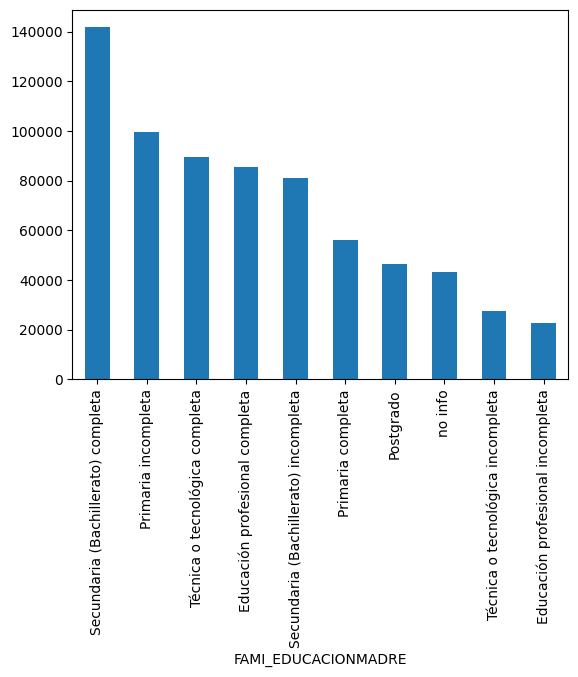

In [32]:
z.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_EDUCACIONPADRE'>

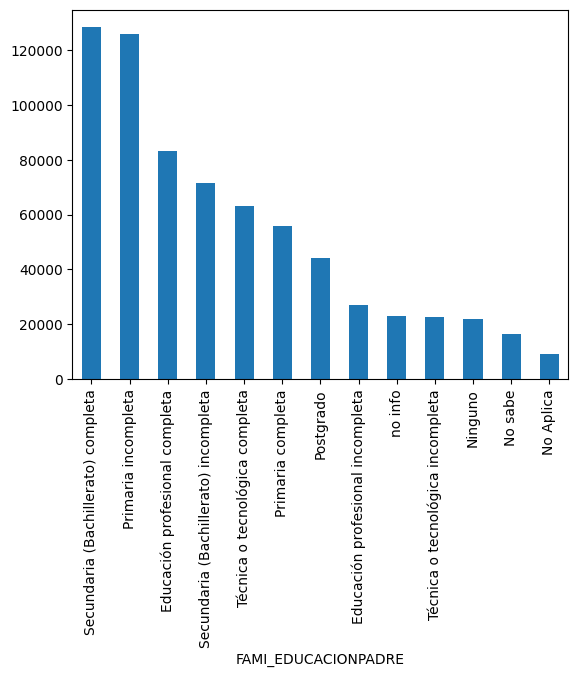

In [ ]:
z.FAMI_EDUCACIONPADRE.value_counts().plot(kind='bar')

Visualizando los datos de los estudiantes con respecto a la educación de la madre

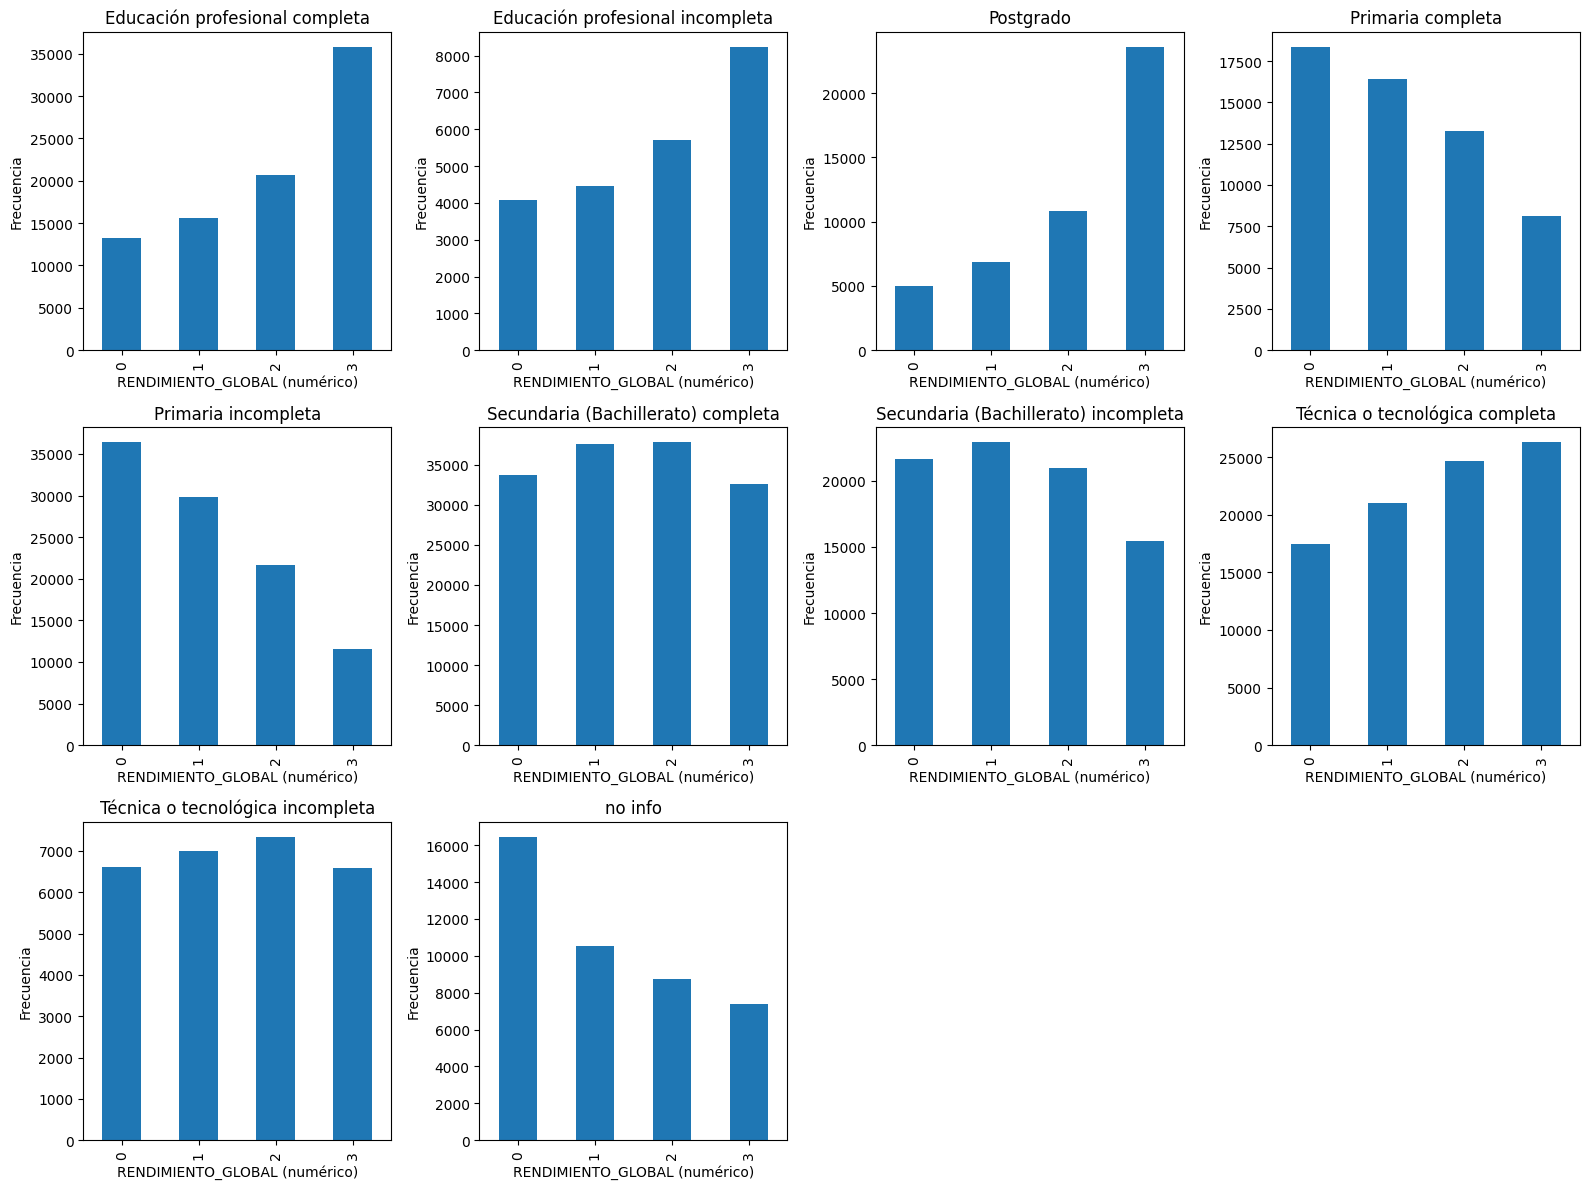

In [33]:
# Lista de categorías (ordenadas)
import matplotlib.pyplot as plt

c = sorted(z.FAMI_EDUCACIONMADRE.value_counts().iloc[0:15].index)

# Crear subgráficos
n_cols = 4  # Número de columnas
n_rows = (len(c) + n_cols - 1) // n_cols  # Calcular filas necesarias
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()  # Asegurar que los ejes sean accesibles como lista

# Niveles esperados (numéricos)
expected_levels = [0, 1, 2, 3]  # Correspondientes a bajo, medio-bajo, medio-alto, alto

# Graficar cada categoría
for ax, ci in zip(axes, c):
    zc = z[z.FAMI_EDUCACIONMADRE == ci]
    # Asegurar que todos los niveles estén presentes con frecuencia 0 si faltan
    counts = zc['RENDIMIENTO_GLOBAL'].value_counts().reindex(expected_levels, fill_value=0)
    counts.plot(kind='bar', ax=ax)
    ax.set_title(ci)
    ax.set_xlabel("RENDIMIENTO_GLOBAL (numérico)")
    ax.set_ylabel("Frecuencia")

# Ocultar ejes no utilizados si hay menos categorías que subgráficos
for ax in axes[len(c):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


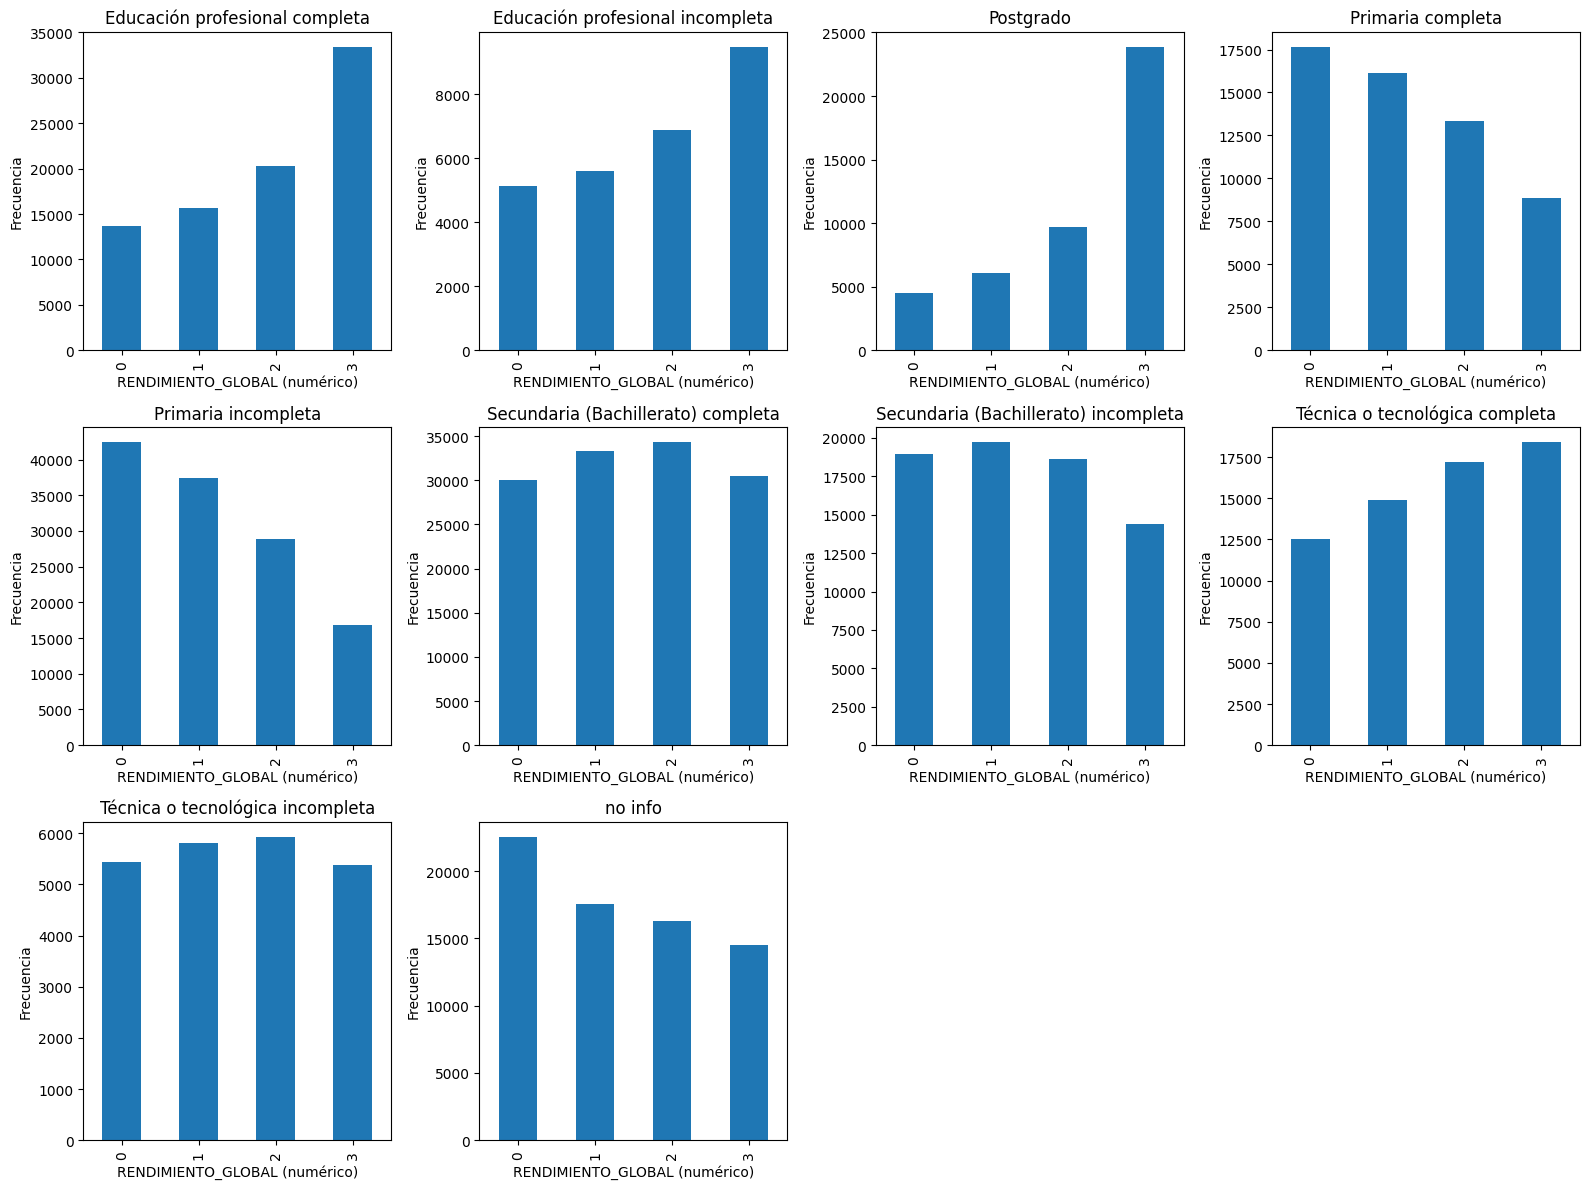

In [34]:
# Lista de categorías (ordenadas)
c = sorted(z.FAMI_EDUCACIONPADRE.value_counts().iloc[0:15].index)

# Crear subgráficos
n_cols = 4  # Número de columnas
n_rows = (len(c) + n_cols - 1) // n_cols  # Calcular filas necesarias
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()  # Asegurar que los ejes sean accesibles como lista

# Niveles esperados (numéricos)
expected_levels = [0, 1, 2, 3]  # Correspondientes a bajo, medio-bajo, medio-alto, alto

# Graficar cada categoría
for ax, ci in zip(axes, c):
    zc = z[z.FAMI_EDUCACIONPADRE == ci]
    # Asegurar que todos los niveles estén presentes con frecuencia 0 si faltan
    counts = zc['RENDIMIENTO_GLOBAL'].value_counts().reindex(expected_levels, fill_value=0)
    counts.plot(kind='bar', ax=ax)
    ax.set_title(ci)
    ax.set_xlabel("RENDIMIENTO_GLOBAL (numérico)")
    ax.set_ylabel("Frecuencia")

# Ocultar ejes no utilizados si hay menos categorías que subgráficos
for ax in axes[len(c):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [35]:
padre = {
    "no info": -1,
    "Primaria incompleta": 1,
    "Primaria completa": 2,
    "Secundaria (Bachillerato) incompleta": 3,
    "Secundaria (Bachillerato) completa": 4,
    "Técnica o tecnológica incompleta":5,
    "Técnica o tecnológica completa":6,
    "Universitario incompleto":7,
    "Educación profesional completa":8,
    "Educación profesional incompleta":9,
    "Postgrado":10,
    "No sabe": -1,
    "Ninguno" :-1,
    "No Aplica": -1
}
z.FAMI_EDUCACIONPADRE = np.r_[[padre[i] for i in z.FAMI_EDUCACIONPADRE]]

x = z.FAMI_EDUCACIONPADRE.values
FAMI_EDUCACIONPADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONPADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONPADRE_vals)}
FAMI_EDUCACIONPADRE_onehot_vals

{-1: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 1: array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 2: array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 3: array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 4: array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 5: array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 6: array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 8: array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 9: array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 10: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [36]:
FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in z.FAMI_EDUCACIONPADRE]]
FAMI_EDUCACIONPADRE_onehot_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
FAMI_EDUCACIONPADRE_df

,FAMI_EDUCACIONPADRE__-1,FAMI_EDUCACIONPADRE__1,FAMI_EDUCACIONPADRE__2,FAMI_EDUCACIONPADRE__3,FAMI_EDUCACIONPADRE__4,FAMI_EDUCACIONPADRE__5,FAMI_EDUCACIONPADRE__6,FAMI_EDUCACIONPADRE__8,FAMI_EDUCACIONPADRE__9,FAMI_EDUCACIONPADRE__10
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692496,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
z = pd.concat([FAMI_EDUCACIONPADRE_df, z], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
z.shape

(692500, 12)

Para la madre

In [39]:
madre = {
    "no info": -1,
    "Primaria incompleta": 1,
    "Primaria completa": 2,
    "Secundaria (Bachillerato) incompleta": 3,
    "Secundaria (Bachillerato) completa": 4,
    "Técnica o tecnológica incompleta":5,
    "Técnica o tecnológica completa":6,
    "Universitario incompleto":7,
    "Educación profesional completa":8,
    "Educación profesional incompleta":9,
    "Postgrado":10,
    "No sabe": -1,
    "Ninguno" :-1,
    "No Aplica": -1
}
z.FAMI_EDUCACIONMADRE = np.r_[[madre[i] for i in z.FAMI_EDUCACIONMADRE]]

x = z.FAMI_EDUCACIONMADRE.values
FAMI_EDUCACIONMADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONMADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONMADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONMADRE_vals)}
FAMI_EDUCACIONMADRE_onehot_vals

{-1: array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 1: array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 2: array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 3: array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 4: array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 5: array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 6: array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 8: array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 9: array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 10: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [40]:
FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[FAMI_EDUCACIONMADRE_onehot_vals[i] for i in z.FAMI_EDUCACIONMADRE]]
FAMI_EDUCACIONMADRE_onehot_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
FAMI_EDUCACIONMADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in FAMI_EDUCACIONMADRE_onehot_vals])
FAMI_EDUCACIONMADRE_df

,FAMI_EDUCACIONMADRE__-1,FAMI_EDUCACIONMADRE__1,FAMI_EDUCACIONMADRE__2,FAMI_EDUCACIONMADRE__3,FAMI_EDUCACIONMADRE__4,FAMI_EDUCACIONMADRE__5,FAMI_EDUCACIONMADRE__6,FAMI_EDUCACIONMADRE__8,FAMI_EDUCACIONMADRE__9,FAMI_EDUCACIONMADRE__10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
z = pd.concat([FAMI_EDUCACIONMADRE_df, z], axis=1).drop('FAMI_EDUCACIONMADRE', axis=1)
z.shape

(692500, 21)

In [ ]:
z.head()

,FAMI_EDUCACIONMADRE__-1,FAMI_EDUCACIONMADRE__1,FAMI_EDUCACIONMADRE__2,FAMI_EDUCACIONMADRE__3,FAMI_EDUCACIONMADRE__4,FAMI_EDUCACIONMADRE__5,FAMI_EDUCACIONMADRE__6,FAMI_EDUCACIONMADRE__8,FAMI_EDUCACIONMADRE__9,FAMI_EDUCACIONMADRE__10,...,FAMI_EDUCACIONPADRE__1,FAMI_EDUCACIONPADRE__2,FAMI_EDUCACIONPADRE__3,FAMI_EDUCACIONPADRE__4,FAMI_EDUCACIONPADRE__5,FAMI_EDUCACIONPADRE__6,FAMI_EDUCACIONPADRE__8,FAMI_EDUCACIONPADRE__9,FAMI_EDUCACIONPADRE__10,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Ahora se hace el modelo para la predicción

In [43]:
z = z[sorted(z.columns)]
#y_col es rendimiento global
X = z[[c for c in z.columns if c!=y_col]].values
y = z[y_col].values
X.shape, y.shape


((692500, 20), (692500,))

In [44]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 20), (138500, 20), (554000,), (138500,))

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Definir el modelo GradientBoosting
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Entrenar el modelo
gb.fit(Xtr, ytr)


GradientBoostingClassifier(random_state=42)

In [46]:
preds_tr = gb.predict(Xtr)
preds_ts = gb.predict(Xts)

In [47]:
print (preds_tr[:50])
print (preds_ts[:50])

[3 0 3 0 3 3 3 1 0 0 0 0 3 0 3 0 1 3 0 2 1 2 0 2 1 1 2 1 3 3 0 2 3 1 3 0 2
 2 0 3 0 2 3 1 2 2 3 1 1 1]
[2 1 2 3 2 3 3 0 0 0 3 0 1 0 0 2 0 1 0 0 0 0 1 3 1 0 2 2 0 0 2 1 3 3 3 0 0
 0 0 0 2 2 3 3 3 3 2 0 2 1]


Se obtienen las predcciones con base a lo obtenido